MovieWriter Pillow unavailable; using Pillow instead.
/var/folders/n7/x0fwwp8x0jvgxqnmqjfvghqh0000gn/T/ipykernel_11438/3813424383.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = padel_states_gdf[padel_states_gdf.NAME == state].geometry.centroid
/var/folders/n7/x0fwwp8x0jvgxqnmqjfvghqh0000gn/T/ipykernel_11438/3813424383.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = padel_states_gdf[padel_states_gdf.NAME == state].geometry.centroid
/var/folders/n7/x0fwwp8x0jvgxqnmqjfvghqh0000gn/T/ipykernel_11438/3813424383.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before

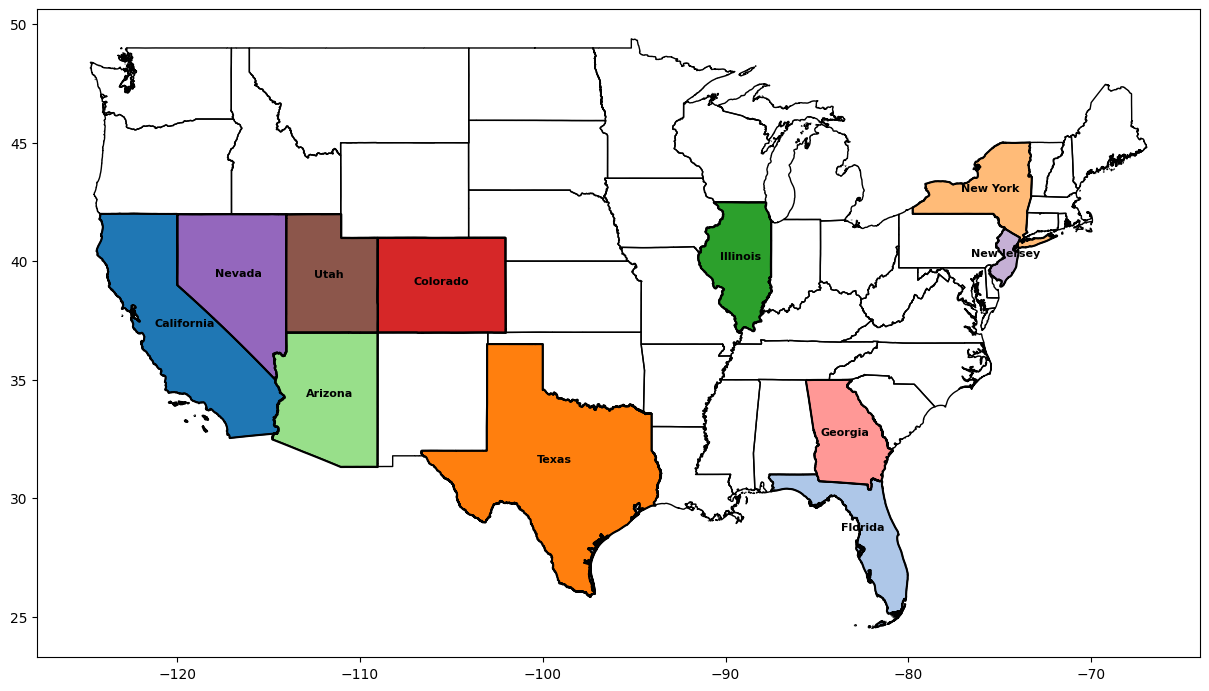

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap
import requests
import zipfile
import os

# URL of the shapefile
url = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip'

# Download the file
response = requests.get(url)
zip_path = 'cb_2021_us_state_500k.zip'

with open(zip_path, 'wb') as f:
    f.write(response.content)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('cb_2021_us_state_500k')

# Clean up the zip file
os.remove(zip_path)

# Load US states shapefile from the extracted folder
shapefile_path = 'cb_2021_us_state_500k/cb_2021_us_state_500k.shp'
states = gpd.read_file(shapefile_path)

# List of states where padel is popular
padel_states = ["California", "Florida", "Texas", "New York", "Illinois", "Arizona", "Colorado", "Georgia", "Nevada", "New Jersey", "Utah"]

# Exclude non-contiguous states and territories by focusing on the main contiguous landmass
contiguous_states = states.cx[-125:-65, 25:50]

# Filter states where padel is popular
padel_states_gdf = contiguous_states[contiguous_states.NAME.isin(padel_states)]

# Define colormap
colormap = ListedColormap(plt.cm.tab20.colors[:len(padel_states)])

# Plot base map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.axis('off')  # Turn off the axis
contiguous_states.boundary.plot(ax=ax, linewidth=1, color='black')

# Number of frames and interval for the animation
num_frames = len(padel_states)
total_duration_ms = 4000  # total duration in milliseconds (4 minutes)
interval_ms = total_duration_ms / num_frames

# Animation function
def animate(i):
    ax.clear()
    contiguous_states.boundary.plot(ax=ax, linewidth=1, color='black')
    if i < len(padel_states):
        for j in range(i+1):
            state = padel_states[j]
            padel_states_gdf[padel_states_gdf.NAME == state].plot(ax=ax, color=colormap(j), edgecolor='black', linewidth=1.5)
            centroid = padel_states_gdf[padel_states_gdf.NAME == state].geometry.centroid
            for x, y, label in zip(centroid.x, centroid.y, padel_states_gdf[padel_states_gdf.NAME == state].NAME):
                ax.text(x, y, label, fontsize=8, ha='center', weight='bold')

ani = animation.FuncAnimation(fig, animate, frames=num_frames, interval=interval_ms)

# Save animation using ImageMagick writer
ani.save('padel_growth.gif', writer='Pillow')

plt.show()


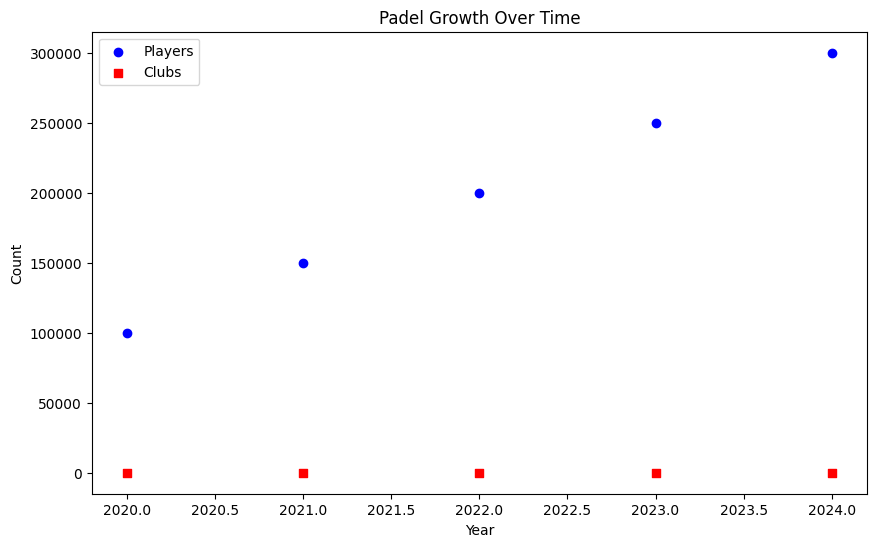

In [16]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Sample data (replace this with your actual data)
data = {
    'Year': [2020, 2021, 2022, 2023, 2024],
    'Players': [100000, 150000, 200000, 250000, 300000],
    'Clubs': [36, 50, 70, 90, 110]
}

df = pd.DataFrame(data)

# Create base plot
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize empty scatter plots for players and clubs
players_scatter = ax.scatter([], [], color='blue', label='Players')
clubs_scatter = ax.scatter([], [], color='red', marker='s', label='Clubs')

ax.legend()

def animate(i):
    ax.clear()
    ax.set_title('Padel Growth Over Time')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')

    # Plot base map or background
    # You can replace this with your geographical map or any other relevant visualization

    # Plot players and clubs for current year
    ax.scatter(df['Year'][:i+1], df['Players'][:i+1], color='blue', label='Players')
    ax.scatter(df['Year'][:i+1], df['Clubs'][:i+1], color='red', marker='s', label='Clubs')

    ax.legend()

# Number of frames
num_frames = len(df)

# Interval between frames (in milliseconds)
interval = 1000

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=num_frames, interval=interval, repeat=False)

# Save animation as GIF
ani.save('padel_growth_animation.gif', writer='pillow')

plt.show()


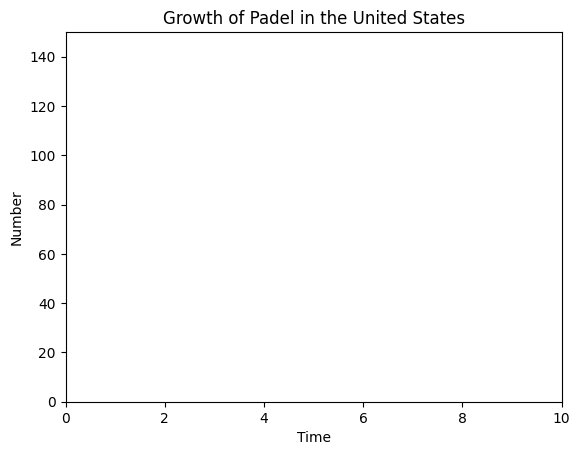

In [17]:
def animate(i):
  # Clear the plot for each frame
  ax.cla()

  # Plot players as blue circles
  for _ in range(players[i]):
    ax.plot([], [], marker='o', markersize=15, markerfacecolor='blue', markeredgewidth=0)

  # Plot clubs as green squares
  for _ in range(clubs[i]):
    ax.plot([], [], marker='s', markersize=20, markerfacecolor='green', markeredgewidth=0)

  # Add labels and title again for each frame
  ax.set_xlabel('Time')
  ax.set_ylabel('Number')
  ax.set_title('Growth of Padel in the United States')
  ax.legend()

  return ax


# Import necessary library
from matplotlib.patches import Rectangle

# Load the background image (replace 'padel_court.png' with your image path)
court_image = plt.imread('padel_court.png')

def animate(i):
  # Clear the plot for each frame
  ax.cla()

  # Add background image (adjust extent as needed)
  ax.imshow(court_image, extent=(0, 10, 0, 150), aspect='auto')

  # Plot players as blue circles (on top of the background)
  for _ in range(players[i]):
    ax.plot([], [], marker='o', markersize=15, markerfacecolor='blue', markeredgewidth=0)

  # Plot clubs as green squares (on top of the background)
  for _ in range(clubs[i]):
    ax.plot([], [], marker='s', markersize=20, markerfacecolor='green', markeredgewidth=0)

  # Add labels and title again for each frame
  ax.set_xlabel('Time')
  ax.set_ylabel('Number')
  ax.set_title('Growth of Padel in the United States')
  ax.legend()

  return ax


import random

def animate(i):
  # Clear the plot for each frame
  ax.cla()

  # Add background image (adjust extent as needed)
  ax.imshow(court_image, extent=(0, 10, 0, 150), aspect='auto')

  # Plot players with random positions within the court
  for _ in range(players[i]):
    x = random.uniform(0, 10)
    y = random.uniform(0, 150)
    ax.plot(x, y, marker='o', markersize=15, markerfacecolor='blue', markeredgewidth=0)

  # Plot clubs with random positions within the court (adjust marker size if needed)
  for _ in range(clubs[i]):
    x = random.uniform(0, 10)
    y = random.uniform(0, 150)
    ax.plot(x, y, marker='s', markersize=30, markerfacecolor='green', markeredgewidth=0)

  # ... (rest of the code)
